## Integral de sen(x) através Monte Carlo

Area 1.96


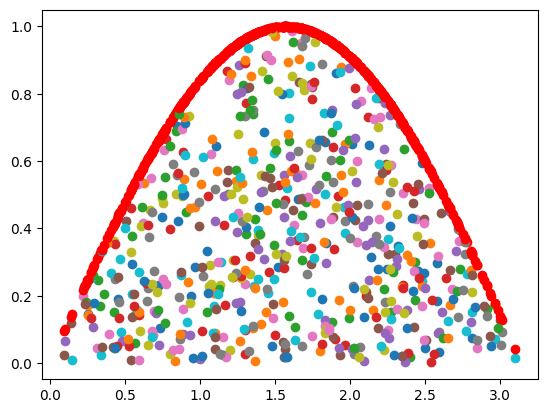

In [1]:
import numpy as np
import matplotlib.pyplot as plt
xI = 0
xF = np.pi
yMax = 1
N = 1000
n = 0
for i in range(N):
  x = xI + (xF-xI)*np.random.rand()
  y = yMax * np.random.rand()
  if y<=np.sin(x):
    plt.scatter(x,y)
    plt.scatter(x,np.sin(x),color = "red")
    n = n+1
    AI = (n/N) * (xF-xI) * yMax
print( 'Area %.2f'%AI )

## Cálculo de $\pi$ através Monte Carlo

pi = 3.1365


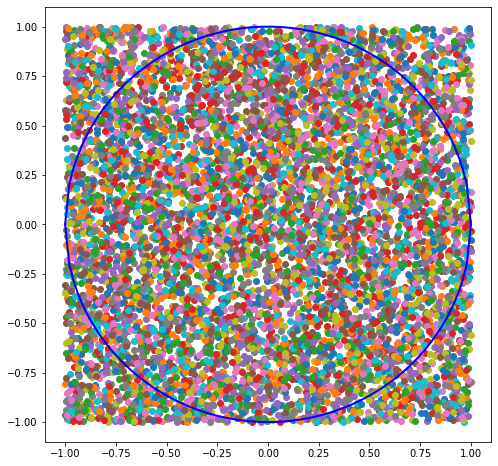

In [ ]:
xc = np.linspace(-1,1,100)
dentro = 0
fora = 0
R = 1
plt.figure(figsize = (8,8))
for k in range(8000):
  x = float(np.random.uniform(-1, 1))
  y = float(np.random.uniform(-1, 1))
  plt.scatter(x,y)
  if float(x**2 + y**2) <= float(R**2):
    dentro += 1
  elif float(x**2 + y**2) > float(R**2):
    fora += 1
plt.plot(xc,np.sqrt(R**2 - xc**2),color = "blue",linewidth = 2)
plt.plot(xc,-np.sqrt(R**2 - xc**2),color = "blue",linewidth = 2)
pi = (dentro/(dentro + fora))*(2*R)**2
print('pi = %.4f'%pi)

In [ ]:

for k in range(100000000):
  x = float(np.random.uniform(-1, 1))
  y = float(np.random.uniform(-1, 1))
  if float(x**2 + y**2) <= float(R**2):
    dentro += 1
  elif float(x**2 + y**2) > float(R**2):
    fora += 1
pi = (dentro/(dentro + fora))*(2*R)**2
print('pi = %.4f'%pi)

pi = 3.1419


$r^2 = x^2 + y^2$

## Simulação de Dados com Valor Real de \( x \) e sua Respectiva Tendenciosidade de Forma Aleatória

Neste código, realizamos uma simulação de Monte Carlo para gerar dados aleatórios com um valor médio real conhecido \( x = 20 \). O objetivo é avaliar a tendenciosidade do estimador da média e a dispersão dos dados.

1. **Geração de Dados Aleatórios**: Para cada uma das 50.000 iterações, são gerados 10 valores aleatórios a partir de uma distribuição normal centrada em \( x \). A média desses valores é calculada após o processo de filtragem via a função `removeMm()`, que remove extremos ou valores discrepantes.

2. **Estatísticas Calculadas**: Após todas as iterações, as seguintes estatísticas são calculadas:
   - \( \sigma_x \) (sx): O desvio padrão das médias amostradas, representando a dispersão das médias.
   - **Tend**: A tendenciosidade (diferença entre a média estimada e o valor real \( x \)).
   - **sTend**: O erro padrão da tendenciosidade, que quantifica a incerteza na estimativa da média.

A simulação permite avaliar a confiabilidade das estimativas da média sob a influência de ruído aleatório.


In [ ]:
def removeMm(array):
  arr = np.sort(array)
  arr = np.delete(arr,[0,-1])
  return arr

array = np.zeros(50000)
arr10 = np.zeros(10)
x = 20
for k in range(len(array)):
  for i in range(len(arr10)):
    arr10[i] = x + np.random.randn()
  array[k] = np.mean(np.mean(removeMm(arr10)))

sx = np.std(array,ddof=1)
tend = np.mean(array)-x
stend = np.std(array,ddof=1)/np.sqrt(len(array))

print(f'sx:{sx}')
print(f'tend:{tend} | stend:{stend}')

sx:0.32217200407494156
tend:0.0013470693618415908 | stend:0.0014407970031178172


In [10]:
#Dados da Simulação
n = 100
x0 = 2
s0x = 1
N = 10000

def simulation(n,x0,sx):
  return x0 + sx*np.random.randn(n)

#N número de historias
historia = np.zeros((3,N))
for k in range(N):
  array = simulation(n,x0,s0x)

  historia[0][k] = np.mean(array)
  historia[1][k] = np.std(array, ddof = 1)
  historia[2][k] = np.std(array, ddof = 1)/np.sqrt(len(array))

# 1 sigma
u = ((historia[0] - historia[2] < x0) & (historia[0] + historia[2] > x0))
# 2 sigma
u2 = ((historia[0] - 2*historia[2] < x0) & (historia[0] + 2*historia[2] > x0))
# 3 sigma
u3 = ((historia[0] - 3*historia[2] < x0) & (historia[0] + 3*historia[2] > x0))

a = historia[0][u]
b = historia[0][u2]
c = historia[0][u3]

print(len(a)/N)
print(len(b)/N)
print(len(c)/N)

media_incerteza = np.mean(historia[2])
desvio_incerteza = np.std(historia[2], ddof=1)

print(f'Média da incerteza: {media_incerteza}')
print(f'Desvio padrão da incerteza: {desvio_incerteza}')
print(f'incerteza da média: {desvio_incerteza}')

0.6787
0.9519
0.9962
Média da incerteza (erro padrão): 0.09981888967729258
Desvio padrão da incerteza (incerteza da incerteza): 0.0071210303115171


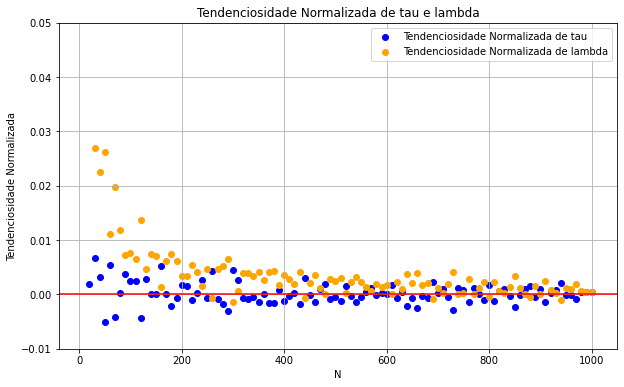

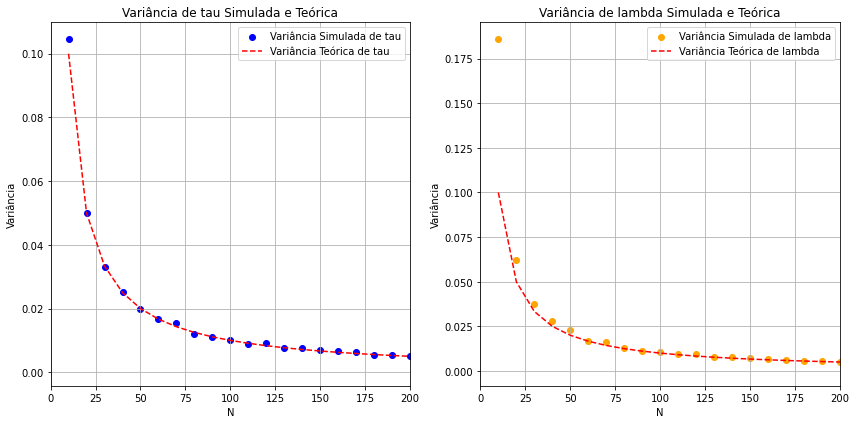

In [2]:
def meia_vida(N, tau_verdadeiro):
    tempos_de_vida = np.random.exponential(tau_verdadeiro, N)
    return tempos_de_vida

def tau_estimado(tempos_de_vida):
    tau_estimado = np.mean(tempos_de_vida)
    return tau_estimado

def lambda_estimado(tempos_de_vida):
    lambda_estimado = 1 / np.mean(tempos_de_vida)
    return lambda_estimado

def main():
    tau_verdadeiro = 1.0  # Valor verdadeiro de tau
    lambda_verdadeiro = 1 / tau_verdadeiro  # Valor verdadeiro de lambda
    N_simulacoes = 1000  # Número de simulações
    valores_N = np.arange(10, 1001, 10)  # Diferentes tamanhos de amostra, de 10 a 1000 com passo de 10

    vieses_tau = []
    vieses_lambda = []
    variancias_tau = []
    variancias_lambda = []

    for N in valores_N:
        estimativas_tau = []
        estimativas_lambda = []

        for _ in range(N_simulacoes):
            tempos_de_vida = meia_vida(N, tau_verdadeiro)
            estimativas_tau.append(tau_estimado(tempos_de_vida))
            estimativas_lambda.append(lambda_estimado(tempos_de_vida))

        estimativas_tau = np.array(estimativas_tau)
        estimativas_lambda = np.array(estimativas_lambda)

        media_estimativa_tau = np.mean(estimativas_tau)
        media_estimativa_lambda = np.mean(estimativas_lambda)

        vies_tau = (media_estimativa_tau - tau_verdadeiro) / tau_verdadeiro
        vies_lambda = (media_estimativa_lambda - lambda_verdadeiro) / lambda_verdadeiro

        vieses_tau.append(vies_tau)
        vieses_lambda.append(vies_lambda)

        # Calculando a variância das estimativas
        variancia_tau = np.var(estimativas_tau, ddof=1)
        variancia_lambda = np.var(estimativas_lambda, ddof=1)

        variancias_tau.append(variancia_tau)
        variancias_lambda.append(variancia_lambda)

    # Plotar os gráficos de dispersão
    plt.figure(figsize=(10, 6))

    # Gráfico 1: Tendenciosidade Normalizada
    plt.scatter(valores_N, vieses_tau, color='blue', label='Tendenciosidade Normalizada de tau')
    plt.scatter(valores_N, vieses_lambda, color='orange', label='Tendenciosidade Normalizada de lambda')
    plt.axhline(0, color='red')
    plt.ylim(-0.01, 0.05)
    plt.xlabel('N')
    plt.ylabel('Tendenciosidade Normalizada')
    plt.title('Tendenciosidade Normalizada de tau e lambda')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Gráfico 2: Variância de tau (simulada e teórica)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    variancias_teoricas_tau = tau_verdadeiro**2 / valores_N
    plt.scatter(valores_N, variancias_tau, color='blue', label='Variância Simulada de tau')
    plt.plot(valores_N, variancias_teoricas_tau, color='red', linestyle='--', label='Variância Teórica de tau')
    plt.xlim(0,200)
    plt.xlabel('N')
    plt.ylabel('Variância')
    plt.title('Variância de tau Simulada e Teórica')
    plt.grid(True)
    plt.legend()

    # Gráfico 3: Variância de lambda (simulada e teórica)
    plt.subplot(1, 2, 2)
    variancias_teoricas_lambda = lambda_verdadeiro**2 / valores_N
    plt.scatter(valores_N, variancias_lambda, color='orange', label='Variância Simulada de lambda')
    plt.plot(valores_N, variancias_teoricas_lambda, color='red', linestyle='--', label='Variância Teórica de lambda')
    plt.xlim(0,200)
    plt.xlabel('N')
    plt.ylabel('Variância')
    plt.title('Variância de lambda Simulada e Teórica')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

main()
